In [2]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA

In [4]:
df_sample = pd.read_csv('C://Users//snuist//Data//Lending_Club_Data_Subsample.csv')

df_X = df_sample.iloc[:, 1:26].as_matrix()
df_y = df_sample[['bad']].as_matrix()

df_X = np.delete(df_X, [4, 6, 8, 11], axis = 1)

In [5]:
df_X = (df_X - np.mean(df_X, axis = 0))/np.std(df_X, axis =0)

In [6]:
np.std(df_X, axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [8]:
n, p = df_X.shape
n, p

(1000, 21)

In [9]:
pca_mdl = PCA(n_components = p)
pca_mdl.fit(df_X)

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_trans = pca_mdl.fit_transform(df_X)

In [11]:
X_trans.shape

(1000, 21)

In [14]:
pca_mdl.explained_variance_

array([ 2.95491633,  1.91979564,  1.85231016,  1.72577899,  1.40636118,
        1.17993947,  1.13799006,  1.09952324,  1.03612415,  1.01970108,
        0.87291041,  0.85899326,  0.8074313 ,  0.77220481,  0.75519266,
        0.53547031,  0.34637506,  0.33423568,  0.28599031,  0.10999145,
        0.00978549])

In [15]:
pca_mdl.explained_variance_ratio_

array([ 0.14056959,  0.09132742,  0.08811704,  0.08209777,  0.06690261,
        0.05613141,  0.05413581,  0.05230589,  0.04928991,  0.04850864,
        0.0415256 ,  0.04086354,  0.03841066,  0.03673489,  0.03592559,
        0.02547309,  0.01647756,  0.01590007,  0.01360497,  0.00523245,
        0.00046551])

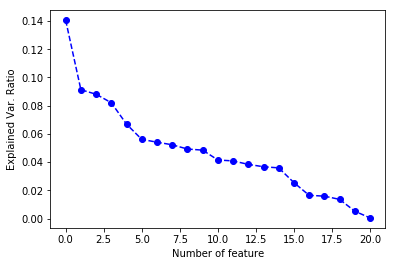

In [18]:
y_cor = pca_mdl.explained_variance_ratio_
X_cor = np.arange(p)

plt.plot(X_cor, y_cor, '--bo')
plt.xlabel('Number of feature')
plt.ylabel('Explained Var. Ratio')
plt.show()

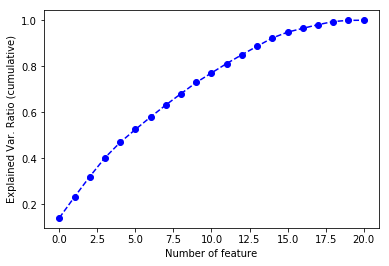

In [21]:
y_cumsum = np.cumsum(y_cor)

plt.plot(X_cor, y_cumsum, '--bo')
plt.xlabel('Number of feature')
plt.ylabel('Explained Var. Ratio (cumulative)')
plt.show()

In [24]:
import statsmodels.api as sm

X_all = np.concatenate((df_X, X_trans[:, 0:1]), axis = 1)

model01 = sm.OLS(df_y, X_all)
result01 = model01.fit()
print(result01.summary())

C:\Users\snuist\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.630
Date:                Mon, 05 Feb 2018   Prob (F-statistic):             0.0365
Time:                        17:40:52   Log-Likelihood:                -389.28
No. Observations:                1000   AIC:                             820.6
Df Residuals:                     979   BIC:                             923.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0272      0.015     -1.769      0.0